## Day 1, Inference and validation

In [2]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data (in grayscale)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [5]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.604..  Test Loss: 0.520..  Test Accuracy: 0.823
Epoch: 2/10..  Training Loss: 0.478..  Test Loss: 0.573..  Test Accuracy: 0.814
Epoch: 3/10..  Training Loss: 0.448..  Test Loss: 0.502..  Test Accuracy: 0.821
Epoch: 4/10..  Training Loss: 0.429..  Test Loss: 0.482..  Test Accuracy: 0.837
Epoch: 5/10..  Training Loss: 0.421..  Test Loss: 0.467..  Test Accuracy: 0.840
Epoch: 6/10..  Training Loss: 0.412..  Test Loss: 0.471..  Test Accuracy: 0.842
Epoch: 7/10..  Training Loss: 0.403..  Test Loss: 0.478..  Test Accuracy: 0.841
Epoch: 8/10..  Training Loss: 0.396..  Test Loss: 0.469..  Test Accuracy: 0.842
Epoch: 9/10..  Training Loss: 0.395..  Test Loss: 0.487..  Test Accuracy: 0.839
Epoch: 10/10..  Training Loss: 0.390..  Test Loss: 0.457..  Test Accuracy: 0.848


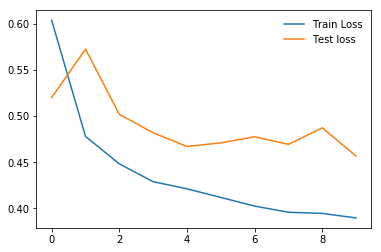

In [8]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test loss')
plt.legend(frameon = False)
plt.show()

In [9]:
## inference

import helper

#evaluate model
model.eval()

images, labels = next(iter(testset))

img = images[2]
img = img.view(1, 784)

with torch.no_grad():
    out = model.forward(img)
ps = torch.exp(out)

helper.classify()

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)